Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
#Defining packages to use
import requests as rq
import pandas as pd
from pandas import DataFrame
import numpy as np
import json
import sqlite3
from sqlite3 import Error
import os
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#Get data from csvs previously saved from part 1 and 2
city_bike_data  = pd.read_csv('data/cityBikeData.csv')
yelp_data       = pd.read_csv('data/yelp_data.csv')
foursquare_data = pd.read_csv('data/foursquare_data.csv')

In [4]:
#Remove columns not needed for merge Forsquare data
foursquare_data.drop(columns=['fsq_id','category_name','category_name','latitude','longitude'],inplace = True, axis = 1)
foursquare_data

,bk_station_distance,name,uid
0,36,Tony's Saloon,bcycle_lametro_3037
1,134,Everson Rocye Bar,bcycle_lametro_3037
2,132,Bread Lounge,bcycle_lametro_3037
3,88,Guerrilla Tacos,bcycle_lametro_3037
4,93,Afuri Ramen,bcycle_lametro_3037
...,...,...,...
2206,579,Espresso Profeta,bcycle_lametro_4644
2207,541,Tender Greens,bcycle_lametro_4644
2208,353,Cava,bcycle_lametro_4644
2209,763,Poke Me,bcycle_lametro_4644


In [5]:
#Remove columns not needed for merge yelp data
yelp_data.drop(columns=['yelp_id','category_name','latitude','longitude'], inplace = True, axis = 1)
yelp_data

,bk_station_distance,name,price,rating,review_count,uid
0,209.717313,Bestia,$$$,4.5,7244,bcycle_lametro_3037
1,884.469696,Urth Caffé- Downtown LA,$$,4.0,5786,bcycle_lametro_3037
2,748.192703,Bavel,$$$,4.5,2100,bcycle_lametro_3037
3,87.197427,Guerrilla Tacos,$$,4.0,1079,bcycle_lametro_3037
4,277.659076,The Lobos Truck,$,4.5,1201,bcycle_lametro_3037
...,...,...,...,...,...,...
4411,768.104557,Poke Me,$$,4.0,715,bcycle_lametro_4644
4412,500.112425,The Boiling Crab,$$$,3.5,970,bcycle_lametro_4644
4413,315.937408,Enzo's Pizzeria,$$,3.5,729,bcycle_lametro_4644
4414,671.493972,Toranj,$$,4.5,446,bcycle_lametro_4644


In [6]:
# Clean and merge data
df_restaurants = pd.merge(yelp_data,foursquare_data, how= 'right', on=['name','uid'])

#Clean restaurants data before merging with city bikes
df_restaurants = df_restaurants.sort_values(['name'], ascending= True)
df_restaurants.drop_duplicates(subset=['name','uid'],keep='first', inplace= True)
df_restaurants['review_count'] = df_restaurants['review_count'].replace(np.nan, 0)
df_restaurants['rating'] = df_restaurants['rating'].replace(np.nan, 0)
df_restaurants['price'].fillna('$$',inplace = True)
df_restaurants['bk_station_distance_y'].fillna(df_restaurants['bk_station_distance_x'], inplace = True) 
df_restaurants.drop(columns=['bk_station_distance_x'], inplace= True, axis = 1)


In [7]:
# Merge restaurants data with city bike
df_all = pd.merge(df_restaurants,city_bike_data, on=['uid'], how='inner')

In [8]:
#Show data merged
df_all

,name,price,rating,review_count,uid,bk_station_distance_y,latitude,longitude,free_bikes
0,10 Speed Coffee-Santa Monica,$$,0.0,0.0,bcycle_lametro_4216,585,34.02339,-118.47964,9
1,Bagel Nosh,$$,0.0,0.0,bcycle_lametro_4216,881,34.02339,-118.47964,9
2,DK's Donuts and Bakery,$$,0.0,0.0,bcycle_lametro_4216,437,34.02339,-118.47964,9
3,Goodboybob Coffee,$$,0.0,0.0,bcycle_lametro_4216,623,34.02339,-118.47964,9
4,La Monarca Bakery,$$,0.0,0.0,bcycle_lametro_4216,967,34.02339,-118.47964,9
...,...,...,...,...,...,...,...,...,...
2195,Sabor Colombiano Restaurant,$$,0.0,0.0,bcycle_lametro_4313,641,34.05681,-118.27500,9
2196,Seoul Garden Restaurant,$$,4.0,575.0,bcycle_lametro_4313,711,34.05681,-118.27500,9
2197,Shabuya,$$,4.0,865.0,bcycle_lametro_4313,669,34.05681,-118.27500,9
2198,Starbucks,$$,0.0,0.0,bcycle_lametro_4313,449,34.05681,-118.27500,9


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [9]:
#Basic information about data
df_forstats = df_all.drop(columns=['latitude','longitude','uid'])
df_forstats.describe()


,rating,review_count,bk_station_distance_y,free_bikes
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,1.330682,597.094091,458.487727,6.828636
std,1.923642,1821.553228,269.360293,3.013113
min,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,238.000000,5.000000
50%,0.000000,0.000000,430.000000,6.000000
75%,4.000000,552.000000,666.250000,9.000000
max,5.000000,18069.000000,1015.000000,17.000000


In [10]:
#Get datatypes

df_forstats.dtypes

name                      object
price                     object
rating                   float64
review_count             float64
bk_station_distance_y      int64
free_bikes                 int64
dtype: object

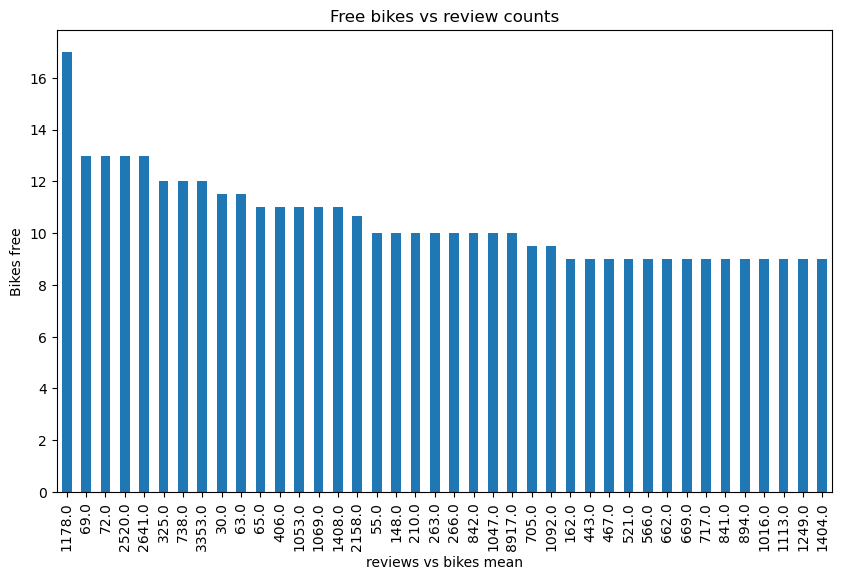

In [11]:
#Histogram
data_plot =df_forstats.groupby('review_count')['free_bikes'].mean()
data_plot.nlargest(40).plot(kind='bar', figsize=(10,6))
plt.title("Free bikes vs review counts")
plt.ylabel('Bikes free')
plt.xlabel('reviews vs bikes mean');
plt.show()
#df_forstats[['free_bikes']].boxplot()

,rating,review_count,bk_station_distance_y,free_bikes
rating,1.000000,0.465584,0.004932,-0.009049
review_count,0.465584,1.000000,-0.008957,0.058748
bk_station_distance_y,0.004932,-0.008957,1.000000,-0.094363
free_bikes,-0.009049,0.058748,-0.094363,1.000000


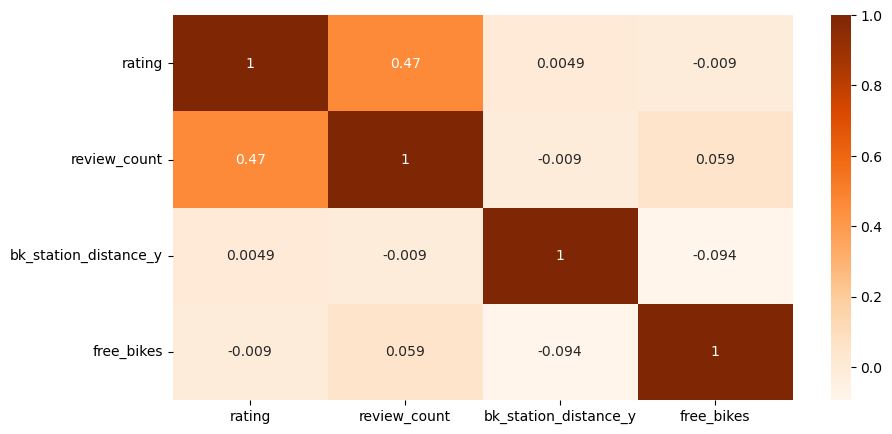

In [12]:
#Review correlation with parameters
plt.figure(figsize=(10,5))
cor = df_forstats.corr()
sb.heatmap(cor,cmap=plt.cm.Oranges,annot=True) #cmap=plt.cm.Oranges,
cor

Text(0.5, 0, 'Distance from restaurant')

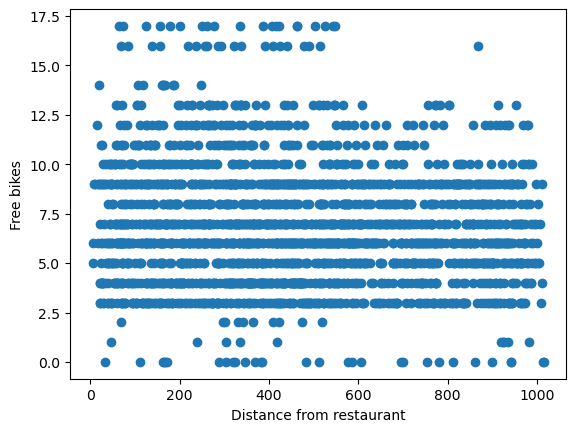

In [24]:
#Scatter plot for distance and free bikes
plt.scatter(df_forstats['bk_station_distance_y'],df_forstats['free_bikes'])
plt.ylabel('Free bikes')
plt.xlabel('Distance from restaurant')

Text(0.5, 0, 'Free bikes')

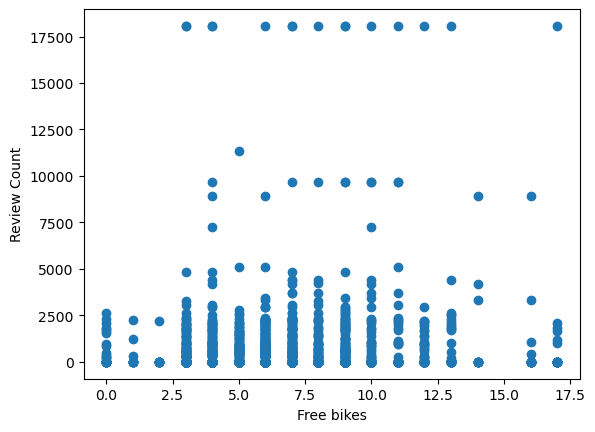

In [25]:
#Scatter plot for review count and free bikes
plt.scatter(df_forstats['free_bikes'],df_forstats['review_count'])
plt.ylabel('Review Count')
plt.xlabel('Free bikes')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [15]:
#function to open connection
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    return conn

In [16]:
#Open connection
conn = create_connection('data/project2.db')

In [17]:
#Function to run queries
def execute_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [18]:
#Create table query
create_bikeLA_table = """
CREATE TABLE IF NOT EXISTS bikeLA (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  price TEXT NOT NULL,
  rating FLOAT,
  review_count INT NOT NULL,
  uid TEXT NOT NULL,
  distance INT NOT NULL,
  latitude FLOAT NOT NULL,
  longitude FLOAT NOT NULL,
  free_bikes INT NOT NULL
);
"""
#Execute table creation
create_table = execute_query(conn,create_bikeLA_table)


In [19]:
#Delete table content if some
delete_data = "DELETE FROM bikeLA"
execute_query(conn, delete_data)

#table name
table_name = 'bikeLA'

#Move data into table from dataframe
df_all.to_sql(table_name,conn,if_exists='replace',index=False)

#Commint job and close connection
conn.commit()
conn.close()


In [20]:
#Open connection
conn = create_connection('data/project2.db')

#Select from all data
select_bikeLA = "SELECT * FROM bikeLA"

#result = execute_query(conn, select_bikeLA) #Activate if want to see data directly from sql
#Move values to dataframe
result_df = pd.read_sql_query(select_bikeLA,conn)
#print(result) #Activate if want to see data directly from sql

Look at the data before and after the join to validate your data.

In [21]:
#Data from dataframe
df_all

,name,price,rating,review_count,uid,bk_station_distance_y,latitude,longitude,free_bikes
0,10 Speed Coffee-Santa Monica,$$,0.0,0.0,bcycle_lametro_4216,585,34.02339,-118.47964,9
1,Bagel Nosh,$$,0.0,0.0,bcycle_lametro_4216,881,34.02339,-118.47964,9
2,DK's Donuts and Bakery,$$,0.0,0.0,bcycle_lametro_4216,437,34.02339,-118.47964,9
3,Goodboybob Coffee,$$,0.0,0.0,bcycle_lametro_4216,623,34.02339,-118.47964,9
4,La Monarca Bakery,$$,0.0,0.0,bcycle_lametro_4216,967,34.02339,-118.47964,9
...,...,...,...,...,...,...,...,...,...
2195,Sabor Colombiano Restaurant,$$,0.0,0.0,bcycle_lametro_4313,641,34.05681,-118.27500,9
2196,Seoul Garden Restaurant,$$,4.0,575.0,bcycle_lametro_4313,711,34.05681,-118.27500,9
2197,Shabuya,$$,4.0,865.0,bcycle_lametro_4313,669,34.05681,-118.27500,9
2198,Starbucks,$$,0.0,0.0,bcycle_lametro_4313,449,34.05681,-118.27500,9


In [22]:
#Data from sql table into dataframe
result_df

,name,price,rating,review_count,uid,bk_station_distance_y,latitude,longitude,free_bikes
0,10 Speed Coffee-Santa Monica,$$,0.0,0.0,bcycle_lametro_4216,585,34.02339,-118.47964,9
1,Bagel Nosh,$$,0.0,0.0,bcycle_lametro_4216,881,34.02339,-118.47964,9
2,DK's Donuts and Bakery,$$,0.0,0.0,bcycle_lametro_4216,437,34.02339,-118.47964,9
3,Goodboybob Coffee,$$,0.0,0.0,bcycle_lametro_4216,623,34.02339,-118.47964,9
4,La Monarca Bakery,$$,0.0,0.0,bcycle_lametro_4216,967,34.02339,-118.47964,9
...,...,...,...,...,...,...,...,...,...
2195,Sabor Colombiano Restaurant,$$,0.0,0.0,bcycle_lametro_4313,641,34.05681,-118.27500,9
2196,Seoul Garden Restaurant,$$,4.0,575.0,bcycle_lametro_4313,711,34.05681,-118.27500,9
2197,Shabuya,$$,4.0,865.0,bcycle_lametro_4313,669,34.05681,-118.27500,9
2198,Starbucks,$$,0.0,0.0,bcycle_lametro_4313,449,34.05681,-118.27500,9


In [23]:
#Export results to csv
df_all.to_csv('data/final_data.csv',index = False, sep= ',')